<a href="https://colab.research.google.com/github/Anika7j/minor_project/blob/main/minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from tabulate import tabulate
import pandas as pd
from sklearn.cluster import KMeans
import random
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#data cleaning and extracting relevant features
df1 = pd.read_csv("food_coded.csv")
df=df1[["cook","diet_current_coded","eating_out","sports","exercise","fav_cuisine_coded","on_off_campus","pay_meal_out","fav_food","fruit_day","income"]]
df.dropna(axis=0,inplace=True)
df.to_csv("food_coded.csv")
df

,cook,diet_current_coded,eating_out,sports,exercise,fav_cuisine_coded,on_off_campus,pay_meal_out,fav_food,fruit_day,income
0,2.0,1,3,1.0,1.0,3,1.0,2,1.0,5,5.0
1,3.0,2,2,1.0,1.0,1,1.0,4,1.0,4,4.0
2,1.0,3,2,2.0,2.0,1,2.0,3,3.0,5,6.0
3,2.0,2,2,2.0,3.0,3,1.0,2,1.0,4,6.0
4,1.0,2,2,1.0,1.0,1,1.0,4,3.0,4,6.0
...,...,...,...,...,...,...,...,...,...,...,...
118,3.0,2,2,2.0,2.0,5,3.0,4,1.0,5,3.0
119,2.0,2,2,1.0,2.0,8,1.0,3,3.0,5,2.0
120,3.0,2,2,1.0,2.0,1,3.0,4,1.0,5,4.0
122,3.0,2,3,2.0,2.0,4,1.0,4,1.0,4,2.0


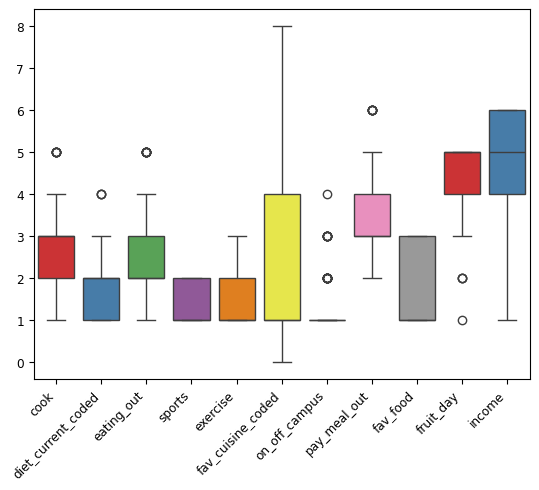

In [5]:
#Plotting Boxplot for cleaned data
sns.boxplot(data=df, palette="Set1").tick_params(labelsize=8.7)
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:
#K-Means clustering on cleaned data
k = 3
kmeans = KMeans(n_clusters = k, random_state=0).fit(df)
df['Cluster']=kmeans.labels_

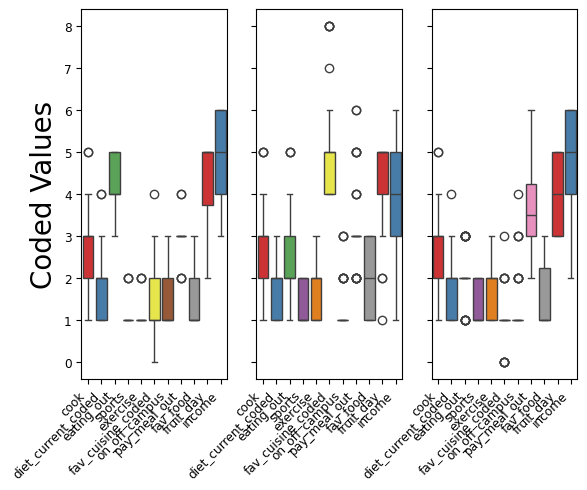

In [9]:
#Plotting Boxplot for optimal K value (K=3)
fig, axes = plt.subplots(1, k, sharey=True)
axes[0].set_ylabel('Coded Values', fontsize=20)

for i in range(k):
     plt.sca(axes[i])
     plt.xticks(rotation=45,ha='right')
     sns.boxplot(palette="Set1",data = df[df['Cluster'] == i].drop('Cluster',axis=1), ax=axes[i]).tick_params(labelsize=8.7)

plt.show()

KMeans(n_clusters=1, random_state=60)
KMeans(n_clusters=2, random_state=60)
KMeans(n_clusters=3, random_state=60)
KMeans(n_clusters=4, random_state=60)
KMeans(n_clusters=5, random_state=60)
KMeans(n_clusters=6, random_state=60)
KMeans(n_clusters=7, random_state=60)
KMeans(random_state=60)
KMeans(n_clusters=9, random_state=60)
KMeans(n_clusters=10, random_state=60)


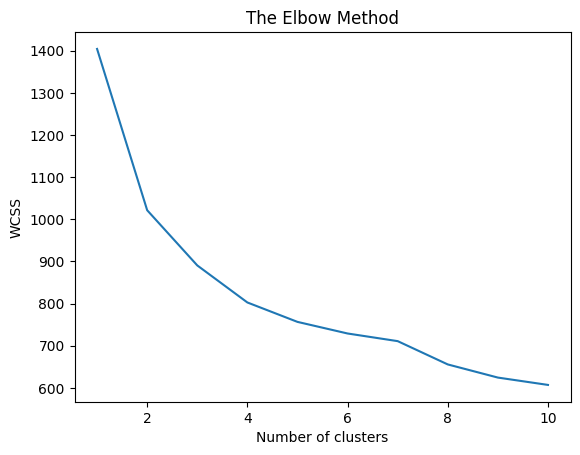

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 60)
    res = kmeans.fit(df)
    print(res)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
import json
import pandas as pd
from pandas import json_normalize
import requests
from tabulate import tabulate
from sklearn.cluster import KMeans
import random
import numpy as np
import pandas as pd
import folium
import warnings
warnings.filterwarnings('ignore')
import os
os.environ.keys()

KeysView(environ({'SHELL': '/bin/bash', 'NV_LIBCUBLAS_VERSION': '12.2.5.6-1', 'NVIDIA_VISIBLE_DEVICES': 'all', 'COLAB_JUPYTER_TRANSPORT': 'ipc', 'NV_NVML_DEV_VERSION': '12.2.140-1', 'NV_CUDNN_PACKAGE_NAME': 'libcudnn8', 'CGROUP_MEMORY_EVENTS': '/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events', 'NV_LIBNCCL_DEV_PACKAGE': 'libnccl-dev=2.19.3-1+cuda12.2', 'NV_LIBNCCL_DEV_PACKAGE_VERSION': '2.19.3-1', 'VM_GCE_METADATA_HOST': '169.254.169.253', 'HOSTNAME': '908355cfd64b', 'LANGUAGE': 'en_US', 'TBE_RUNTIME_ADDR': '172.28.0.1:8011', 'COLAB_TPU_1VM': '', 'GCE_METADATA_TIMEOUT': '3', 'NVIDIA_REQUIRE_CUDA': 'cuda>=12.2 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=quadrortx,driver>=470,driver<471 brand=titan,driver>=470,driver<471 brand=titanrtx,drive

In [22]:
#Fetching data form HERE API for IIT Bombay
url = 'https://discover.search.hereapi.com/v1/discover?in=circle:19.1334,72.9133;r=10000&q=apartment&apiKey=uJHMEjeagmFGldXp661-pDMf4R-PxvWIu7I68UjYC5Q'
data = requests.get(url).json()
if 'error' in data:
    print(f"API request failed: {data['error']}")
    # Handle the error appropriately, e.g., exit the script or retry
else:
    d = json_normalize(data['items'])
    d.to_csv('apartment.csv')
    print(d)

API request failed: Unauthorized
